<hr style="border:1px solid #FEC60D"> </hr>
<center><h1 style="color:#173F8A;"> FUNDAMENTOS MATEMATICOS PARA INTELIGENCIA ARTIFICIAL</h1></center> 
<center><h1 style="color:#173F8A;"> IMT3850 </h1></center>
<hr style="border:1px solid #FEC60D"> </hr>
<center><h3 style="color:#0176DE;text-align:right;"> Profesor. Manuel A. Sanchez<br></h3></center>
<h3 style="color:#03122E;text-align:right;"> Magister en Inteligencia Artificial - MIA <br> Instituto de Ingenieria Matematica y Computacional - IMC<br>  Pontificia Universidad Catolica de Chile<br>   </h3>

<!-- Palette colors UC:
Primaria: 
celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 
Secundaria
gris oscuro: #707070
-->

<hr style="border:2px solid #03122E"> </hr>
<center><h1 style="color:#173F8A;"> Algebra Lineal para IA - clase 1</h1></center> 
<hr style="border:2px solid #03122E"> </hr>

## Tabla de 
0. [Librerias de Python relevantes para el curso](#Librerias)
1. [Ejemplos de vectores: Colores RGB](#Ejemplos-de-vectores:-Colores-RGB") 
2. [Ejemplos de vectores:Imagenes como vectores](#Ejemplos-de-vectores:-Imagenes) 
3. [Ejemplos de operaciones lineales: suma de imagenes](#Ejemplos-de-operaciones-lineales:-suma-de-imagenes)
4. [Ejemplo: Floating point](#Ejemplo:-Floating-point) 
5. [Ejemplo de funcion lineal: Regresion lineal](#Ejemplo-de-funcion-lineal:-Regresion-lineal)
6. [Ejemplo normas p](#Ejemplo:-normas-p)
7. [Ejemplo: angulo entre imagenes](#Ejemplo:-angulo-entre-vectores)
8. [Ejemplo: similaridades de texto con angulo](#Ejemplo:-similaridades-de-texto) 
9. [Ejemplo: clustering datos artificiales](#Ejemplo:-clustering)
10. [Ejemplo: clustering base de datos de digitos](#Ejemplo:-clustering-numeros)
11. [Ejemplo: La base de coseno discreta](#Ejemplo:-La-base-de-coseno-discreto)


## Librerias
- [Numpy](https://numpy.org/doc/stable/)
- [Scipy linear algebra](https://docs.scipy.org/doc/scipy/reference/linalg.html)
- [Matplotlib](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html)
- [Pandas](https://pandas.pydata.org/docs/) 
- [Scikit-learn](https://scikit-learn.org/stable/)

In [1]:
import numpy as np
import scipy.linalg as lg
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
from IPython.display import display, HTML
display(HTML("""<style>.output {display: flex;align-items: center;text-align: center;}</style>"""))

## Ejemplos de vectores: Colores RGB

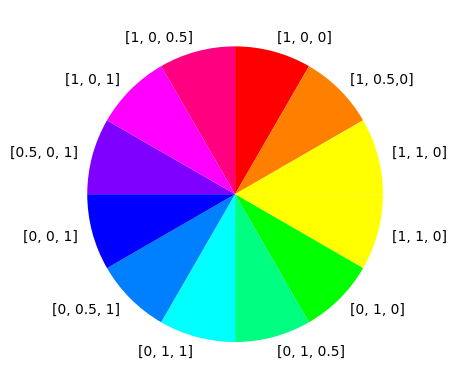

In [2]:
# Define colores como tuplas de 3
colors =[(1, 1, 0),
         (0, 1, 0),
         (0, 1, 0.5),
         (0, 1, 1),
         (0, 0.5, 1),
         (0, 0, 1),
         (0.5, 0, 1),
         (1, 0, 1),
         (1, 0, 0.5),
         (1, 0, 0),
         (1, 0.5,0),
         (1, 1, 0) ]
labels = '[1, 1, 0]','[0, 1, 0]','[0, 1, 0.5]','[0, 1, 1]','[0, 0.5, 1]','[0, 0, 1]','[0.5, 0, 1]','[1, 0, 1]','[1, 0, 0.5]','[1, 0, 0]','[1, 0.5,0]','[1, 1, 0]'
sizes = 30*np.ones(12)
# Graficar
fig, ax = plt.subplots()
ax.pie(sizes, colors = colors,labels=labels, counterclock=False)
# plt.savefig('colowheel.png') # Guardar figura
plt.show()


##  Ejemplos de vectores: Imagenes

In [3]:
# !pip install latexifier
from latexifier import latexify
from IPython.display import Latex
# Vector y matriz aleatoria de aleatorio de enteros
n = 3
c = np.random.randint(3, size=(n*n)); C = c.reshape(n,n)
clatex = latexify(c, newline=True, arraytype="bmatrix")
Clatex = latexify(C, newline=True, arraytype="bmatrix")
display(Latex(clatex))
display(Latex(Clatex))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

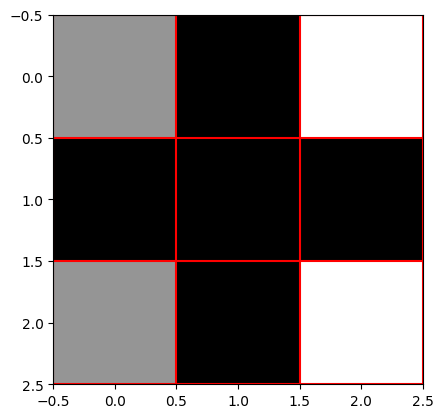

In [4]:
plt.imshow(C, cmap='Greys', interpolation='none')
x = np.linspace(-.5,n-0.5,n+1)
[X,Y] = np.meshgrid(x,x)
plt.plot(X.T,Y.T,'r')
plt.plot(X,Y,'r')
plt.axis('scaled')
plt.show()

##  Ejemplos de operaciones lineales: suma de imagenes

*** Tamano de los vectores: 360000
*** Tamano de las matrices: (600, 600)


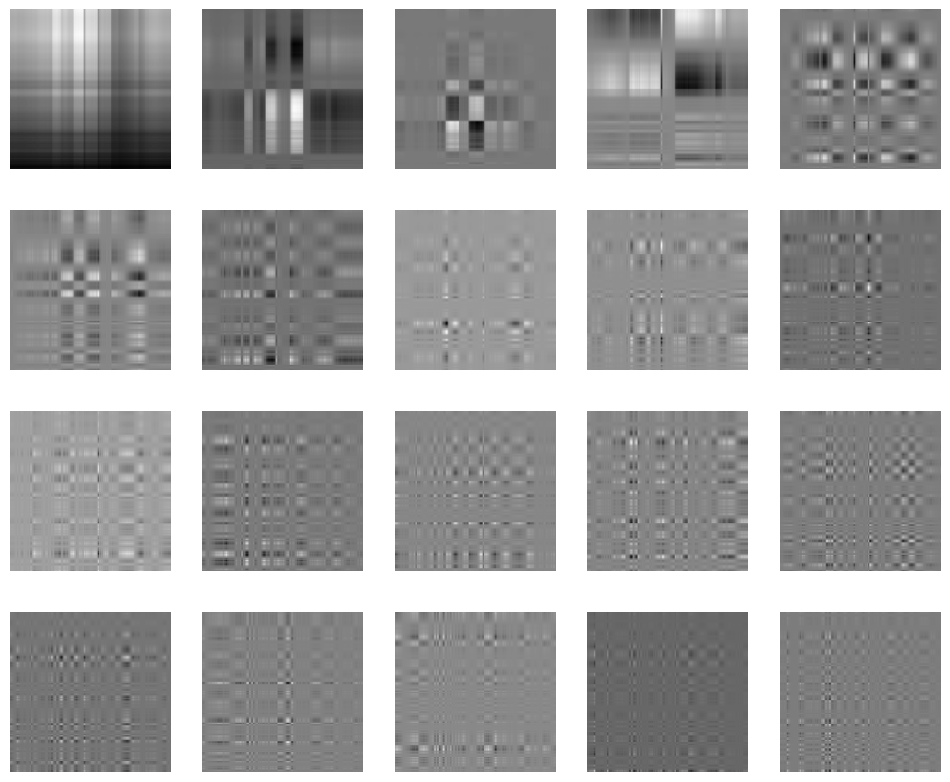

*** Suma de imagenes:


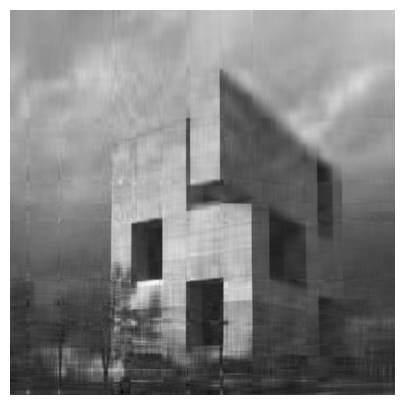

In [5]:
W = np.load('edif_elemental.npy')
print("*** Tamano de los vectores:", W[0].size)
Wimag = []
Wsum = np.zeros(W[0].size)
for w in W:
    Wimag.append(w.reshape(600,600))
    Wsum += w
Wsumimag = Wsum.reshape(600,600)
print('*** Tamano de las matrices:', Wimag[0].shape)

fig1, ax1 = plt.subplots(4,5,figsize=(12,10))
for i, axi in enumerate(fig1.axes):
    axi.imshow(Wimag[i], cmap='gray')
    axi.set_axis_off()
plt.show()

print("*** Suma de imagenes:")
fig2, ax2 = plt.subplots(1,1,figsize=(6,5))
ax2.imshow(Wsumimag, cmap='gray')
ax2.set_axis_off()
plt.show()

In [6]:
# # w = w0+w1+w2+w3+w4+w5+w6+w7+w8+w9+w10+w11+w12+w13+w14+w15+w16+w17+w18+w19+w20
# w = sum([W[i] for i in range(0,21)])
# W = w.reshape(600,600)
# plt.imshow(W, cmap='gray')
# plt.show()

## Ejemplo: Floating point

In [7]:
np.set_printoptions(precision=5)

### Errores de redondeo
Calcular la raiz de la ecuacion $x^{2}-2px - q = 0$

In [8]:
m1_rmin = lambda p,q: p - np.sqrt(p**2+q)
m2_rmin = lambda p,q: -q/(p+np.sqrt(p**2+q))

p = 12345678; q = 1
p16 = np.float16(p)
p32 = np.float32(p)
p64 = np.float64(p)
print(p16,p32,p64)
peval = p32;qeval = q
print("method 1 r_min: ", m1_rmin(peval,qeval))
print("method 2 r_min: ", m2_rmin(peval,qeval))

inf 12345678.0 12345678.0
method 1 r_min:  0.0
method 2 r_min:  -4.05e-08


C:\Users\Manuel Sánchez\AppData\Local\Temp\ipykernel_19160\3973152278.py:5: RuntimeWarning: overflow encountered in cast
  p16 = np.float16(p)


### Una ilustracion de la precision de punto flotante de numpy


In [9]:
pi16 = np.array([np.pi], dtype=np.float16)
pi32 = np.array([np.pi], dtype=np.float32)
pi64 = np.array([np.pi], dtype=np.float64)
print(' pi numpy.float16:',pi16[0],'\n pi numpy.float32:',pi32[0],'\n pi numpy.float64:',pi64[0],'\n numpy.pi        :', np.pi)

 pi numpy.float16: 3.14 
 pi numpy.float32: 3.1415927 
 pi numpy.float64: 3.141592653589793 
 numpy.pi        : 3.141592653589793


## Ejemplo de funcion lineal: Regresion lineal

In [10]:
# Base de datos de casas
housing = pd.read_csv('Housing.csv.xls')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
housing.shape

(545, 13)

In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [13]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [14]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [15]:
y_train = df_train.pop('price')
X_train = df_train[['area', 'bedrooms']]

In [16]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

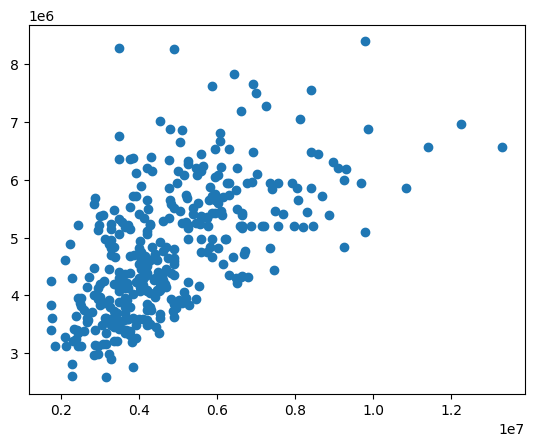

In [17]:
y_pred = lm.predict(X_train)
plt.scatter(y_train, y_pred); plt.show()

## Ejemplo: serie de tiempo temperatura

In [18]:
df = pd.read_csv('Temperatura.csv', delimiter=';', header=0,nrows=41)
df.head()

,Ano,Temperatura Minima Media,Temperatura Minima Absoluta,Temperatura Minima Dia,Temperatura Maxima Media,Temperatura Maxima Absoluta,Temperatura Maxima Dia,Temperatura Media Climatologica,Temperatura Media Aritmetica,Cantidad de Datos
0,2023,6.2,1.5,3,16.9,25.9,29,11.0,11.0,31
1,2022,3.2,-0.6,7,15.0,23.8,29,8.1,8.1,31
2,2021,2.9,-0.5,17,19.2,28.3,20,9.4,9.4,31
3,2020,.,.,.,14.9,23.0,14,.,11.5,31
4,2019,3.6,-1.8,23,16.2,23.4,30,9.9,11.7,31


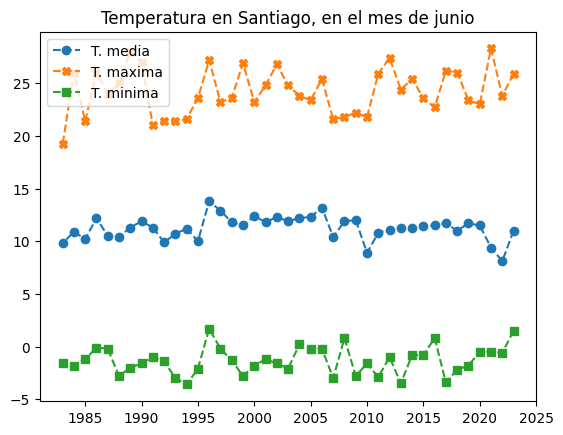

In [19]:
# df.plot(x="Ano", y='Temperatura Media Aritmetica',marker='o', linestyle='--')
x = df["Ano"].to_numpy()
y1 = df["Temperatura Media Aritmetica"].to_numpy()
y1 = np.asarray(y1)
y2 = df["Temperatura Maxima Absoluta"].to_numpy()
y3 = df["Temperatura Minima Absoluta"].to_numpy()
y3[3] = '-0.5'
y3 = y3.astype('float64')
plt.plot(x,y1,'--o', label='T. media')
plt.plot(x,y2,'--X', label='T. maxima')
plt.plot(x,y3,'--s', label='T. minima')
plt.title('Temperatura en Santiago, en el mes de junio')
plt.legend()
plt.show()

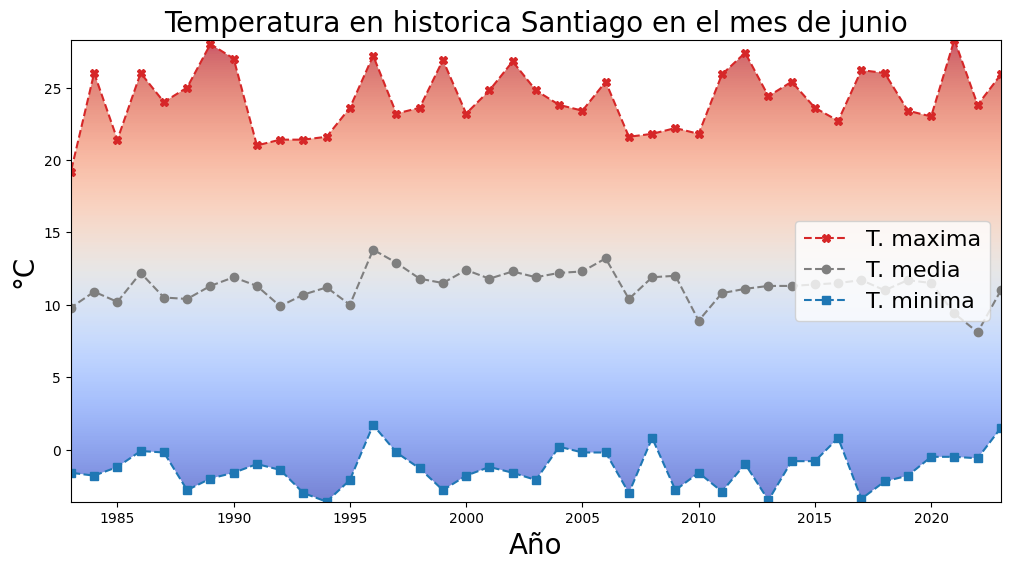

In [20]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
from matplotlib import cm


fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.plot(x,y2,'--X', label='T. maxima', color='C03')
ax.plot(x,y1,'--o', label='T. media',color='C07')
ax.plot(x,y3,'--s', label='T. minima', color='C00')
plt.title('Temperatura en historica Santiago en el mes de junio',fontsize='20')

cm1 = cm.coolwarm

polygon = plt.fill_between(x, y2, y3, lw=0, color='none')
xlim = (x.min(), x.max())
ylim = (y3.min(), y2.max())
verts = np.vstack([p.vertices for p in polygon.get_paths()])
gradient = ax.imshow(np.linspace(0, 1, 256).reshape(-1, 1), cmap=cm1, aspect='auto', origin='lower',
                      extent=[verts[:, 0].min(), verts[:, 0].max(), verts[:, 1].min(), verts[:, 1].max()], alpha=0.7)
gradient.set_clip_path(polygon.get_paths()[0], transform=plt.gca().transData)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.legend(fontsize='16')
ax.set_ylabel('°C',fontsize='20')
ax.set_xlabel('Año',fontsize='20')
fig.savefig('temp_C.png')
plt.show()

In [21]:
def tranCtoF(y):
    return y*9.0/5.0+32
yF1 = tranCtoF(y1)
yF2 = tranCtoF(y2)
yF3 = tranCtoF(y3)

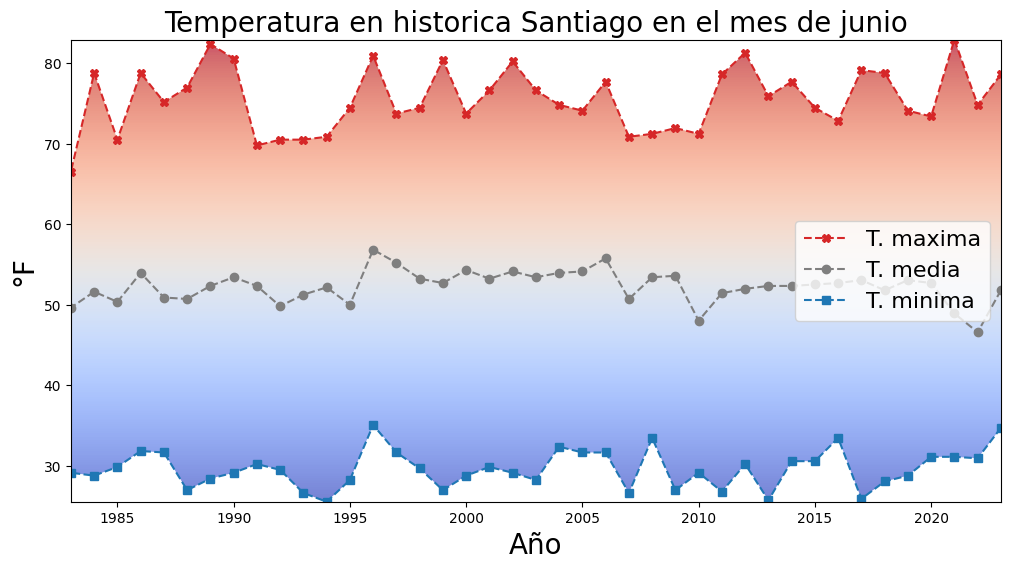

In [22]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.plot(x,yF2,'--X', label='T. maxima', color='C03')
ax.plot(x,yF1,'--o', label='T. media',color='C07')
ax.plot(x,yF3,'--s', label='T. minima', color='C00')
plt.title('Temperatura en historica Santiago en el mes de junio', fontsize='20')

cm1 = cm.coolwarm

polygon = plt.fill_between(x, yF2, yF3, lw=0, color='none')
xlim = (x.min(), x.max())
yFlim = (yF3.min(), yF2.max())
verts = np.vstack([p.vertices for p in polygon.get_paths()])
gradient = ax.imshow(np.linspace(0, 1, 256).reshape(-1, 1), cmap=cm1, aspect='auto', origin='lower',
                      extent=[verts[:, 0].min(), verts[:, 0].max(), verts[:, 1].min(), verts[:, 1].max()], alpha=0.7)
gradient.set_clip_path(polygon.get_paths()[0], transform=plt.gca().transData)
ax.set_xlim(xlim)
ax.set_ylim(yFlim)
ax.legend(fontsize='16')
ax.set_ylabel('°F', fontsize='20')
ax.set_xlabel('Año', fontsize='20')
fig.savefig('temp_F.png')
plt.show()

## Ejemplo: normas p

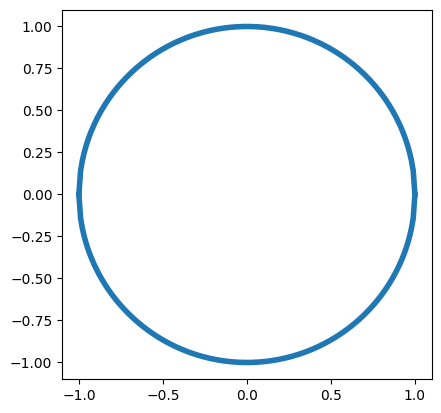

interactive(children=(FloatSlider(value=2.0, description='p', max=6.0, min=-2.0), Output()), _dom_classes=('wi…

In [23]:
# %matplotlib notebook
from ipywidgets import *
x1 = np.linspace(-1.0, 1.0, 200)
def val_norma(x1,p):
    x2pos = (np.abs(1.0 - np.abs(x1)**p))**(1/p)
    x2neg = -(np.abs(1.0 - np.abs(x1)**p))**(1/p)
    return x2pos, x2neg

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect('equal', 'box')
linepos, = ax.plot(x1, val_norma(x1,p=2)[0],'C00', linewidth=4)
lineneg, = ax.plot(x1, val_norma(x1,p=2)[1],'C00', linewidth=4)
def update(p = 2.0):
    linepos.set_ydata(val_norma(x1,p)[0])
    lineneg.set_ydata(val_norma(x1,p)[1])
    fig.canvas.draw_idle()
interact(update);

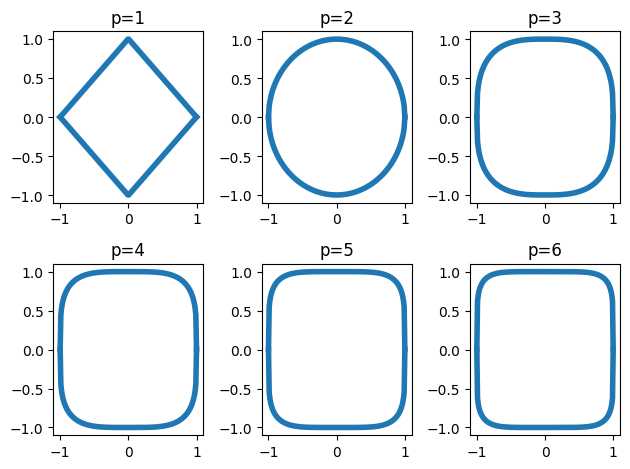

In [24]:
figplots, axplots = plt.subplots(2,3)
for p, axp in enumerate(figplots.axes):
    axp.plot(x1, val_norma(x1,p+1)[0],'C00', linewidth=4)
    axp.plot(x1, val_norma(x1,p+1)[1],'C00', linewidth=4)
    axp.title.set_text('p=' + str(p+1))
figplots.tight_layout()
plt.show()
# figplots.savefig('plotsnorms.png')
    

## Ejemplo: angulo entre vectores

(1024, 1024) 1048576


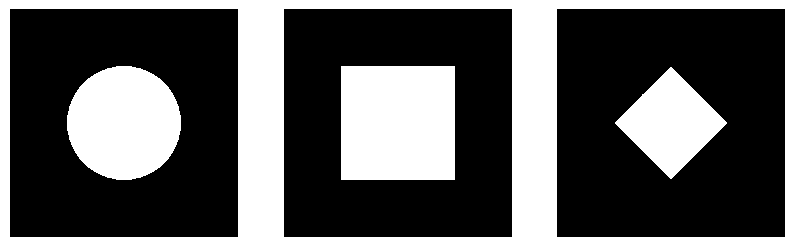

Angulo entre vector circulo y vector cuadrado: 27.69798601187887
Angulo entre vector circulo y vector rombo: 37.1497909700829


In [25]:
# draw_circle
N =1024
x = np.linspace(-1,1,N)
Circle = np.zeros((N,N), dtype=np.int64)
Square = np.zeros((N,N), dtype=np.int64)
Rombo = np.zeros((N,N), dtype=np.int64)
for j in range(N):
    for i in range(N):
        if x[i]**2+x[j]**2 < 0.5**2:
            Circle[i,j] = 1
        if x[i]<=0.5 and x[i]>=-0.5 and x[j]<=0.5 and x[j]>=-0.5:
            Square[i,j] = 1
        if 0.5 + x[i] - x[j]>=0 and 0.5 - x[i] - x[j]>=0 and 0.5 - x[i] + x[j]>=0 and 0.5 + x[i] + x[j]>=0: 
            Rombo[i,j] = 1
circlev = Circle.flatten()
squarev = Square.flatten()
rombov = Rombo.flatten()
print(Circle.shape, circlev.size)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
ax[0].imshow(Circle, cmap=plt.cm.gray, interpolation="nearest")
ax[1].imshow(Square, cmap=plt.cm.gray, interpolation="nearest")
ax[2].imshow(Rombo, cmap=plt.cm.gray, interpolation="nearest")
plt.show()

alpha_circle_square = np.arccos(np.dot(circlev,squarev)/(np.linalg.norm(circlev)*np.linalg.norm(squarev)))
alpha_circle_rombo = np.arccos(np.dot(circlev,rombov)/(np.linalg.norm(circlev)*np.linalg.norm(rombov)))

print(f"Angulo entre vector circulo y vector cuadrado: {alpha_circle_square*180/np.pi}")
print(f"Angulo entre vector circulo y vector rombo: {alpha_circle_rombo*180/np.pi}")

## Ejemplo: similaridades de texto

In [26]:
import re
import math

def preprocess_text(text):
    # Convert to lowercase and remove non-alphabetic characters
    text = re.sub(r'[^a-z]', ' ', text.lower())
    return text.split()

def count_words(text):
    # Count the occurrences of each word in the text
    word_count = {}
    for word in preprocess_text(text):
        word_count[word] = word_count.get(word, 0) + 1
    return word_count

def cosine_similarity(vector1, vector2):
    # Calculate the dot product of the two vectors
    dot_product = sum(vector1[key] * vector2[key] for key in vector1 if key in vector2)

    # Calculate the magnitude (Euclidean norm) of each vector
    magnitude1 = math.sqrt(sum(vector1[key] ** 2 for key in vector1))
    magnitude2 = math.sqrt(sum(vector2[key] ** 2 for key in vector2))

    # Calculate the cosine similarity
    if magnitude1 == 0 or magnitude2 == 0:
        return 0  # Avoid division by zero
    else:
        return dot_product / (magnitude1 * magnitude2)

# Sample texts
texto1 = "Algebra lineal es un topico importante en matematicas y fundamental en data science"
texto2 = "Los estudiantes del MCD deben ser capaces de comprender los fundamentos de esta area"
texto3 = "Inteligencia artificial y aplicaciones de algebra lineal son herramientas usadas en procesamiento de datos"


# Count the occurrences of words in the texts
vector1 = count_words(texto1)
vector2 = count_words(texto2)
vector3 = count_words(texto3)

# Calculate cosine similarity between text1 and text2
sim_texto1_texto2 = cosine_similarity(vector1, vector2)
sim_texto1_texto3 = cosine_similarity(vector1, vector3)
sim_texto2_texto3 = cosine_similarity(vector2, vector3)
print(f"Similaridad entre texto1 y texto2: {sim_texto1_texto2}")
print(f"Similaridad entre texto1 y texto3: {sim_texto1_texto3}")
print(f"Similaridad entre texto2 y texto3: {sim_texto2_texto3}")


Similaridad entre texto1 y texto2: 0.0
Similaridad entre texto1 y texto3: 0.3227486121839514
Similaridad entre texto2 y texto3: 0.23570226039551587


## Ejemplo: clustering

In [27]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

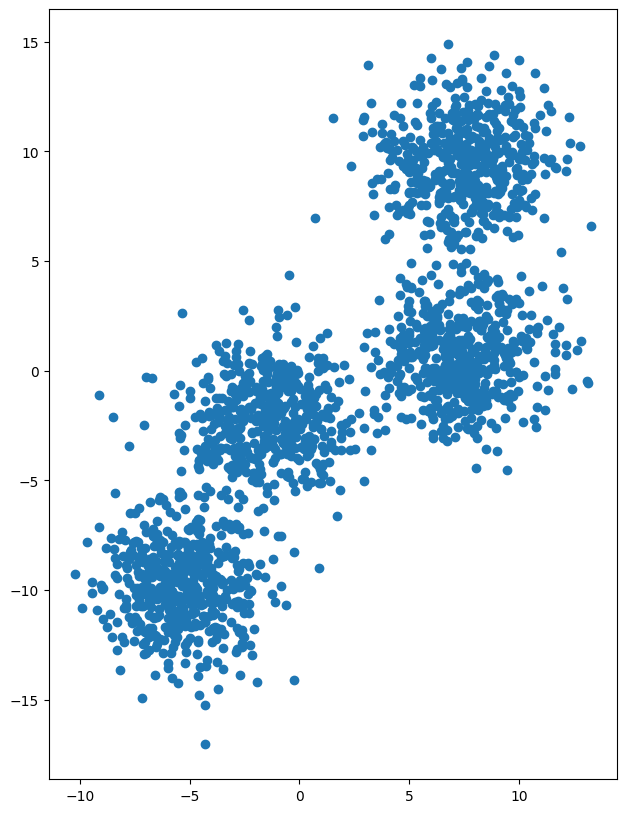

In [28]:
X, y = make_blobs(n_samples=2000, centers=4, cluster_std=1.9, random_state=8)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
ax.scatter(X[:,0], X[:,1])
ax.set_aspect('equal')
plt.show()

In [29]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=1000, n_init=10, random_state=0)

*** J^clust: 14120.269971134563


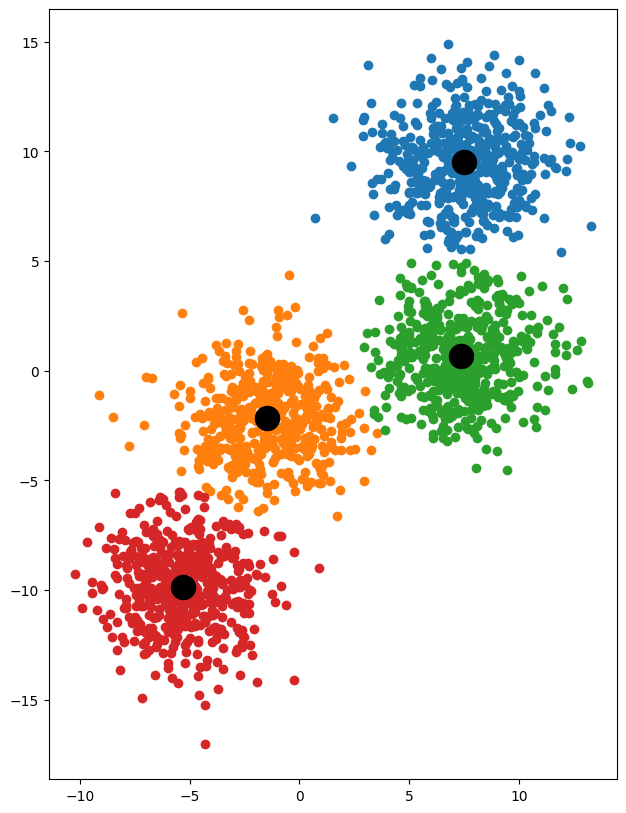

In [30]:
pred_y = kmeans.fit_predict(X)

c0, = np.where(kmeans.labels_==0)
c1, = np.where(kmeans.labels_==1)
c2, = np.where(kmeans.labels_==2)
c3, = np.where(kmeans.labels_==3)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
ax.scatter(X[c0,0], X[c0,1], c='C00')
ax.scatter(X[c1,0], X[c1,1], c='C01')
ax.scatter(X[c2,0], X[c2,1], c='C02')
ax.scatter(X[c3,0], X[c3,1], c='C03')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black')
ax.set_aspect('equal')

print("*** J^clust:", kmeans.inertia_)
plt.show()

## Ejemplo: clustering numeros

In [31]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split

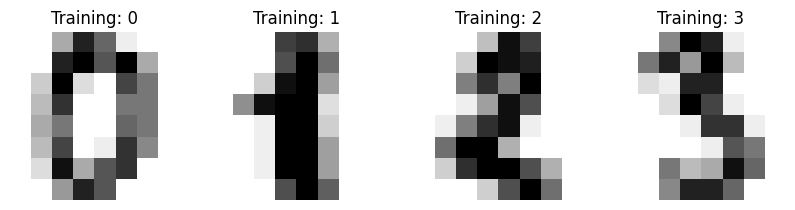

In [32]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)
plt.show()

In [33]:
kmeans = KMeans(n_clusters=10, init='random', max_iter=20000, n_init=10, random_state=0)
arrnew = [arr_j.flatten() for arr_j in digits.images]

pred_y = kmeans.fit_predict(arrnew)

In [34]:
representatives =  kmeans.cluster_centers_
reps_images = [rep_j.reshape(8,8) for rep_j in representatives]


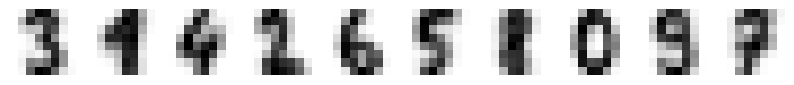

In [35]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, reps_image_j, label in zip(axes, reps_images, digits.target):
    ax.set_axis_off()
    ax.imshow(reps_image_j, cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

## Ejemplo: La base de coseno discreto

La base del coseno discreta en $\mathbb{R}^n$ es una **base ortonormal** consistente de los vectores $v_1,\ldots, v_n$ con componentes
$$
    v_{k,i} = \begin{cases}
            \sqrt{\frac{1}{N}} & k = 1 \\ 
            \sqrt{\frac{2}{N}}\cos\left[\frac{\pi}{n} \left(i - \frac{1}{2}\right)k\right] & k\in\{2,\ldots, n\}
        \end{cases}
$$

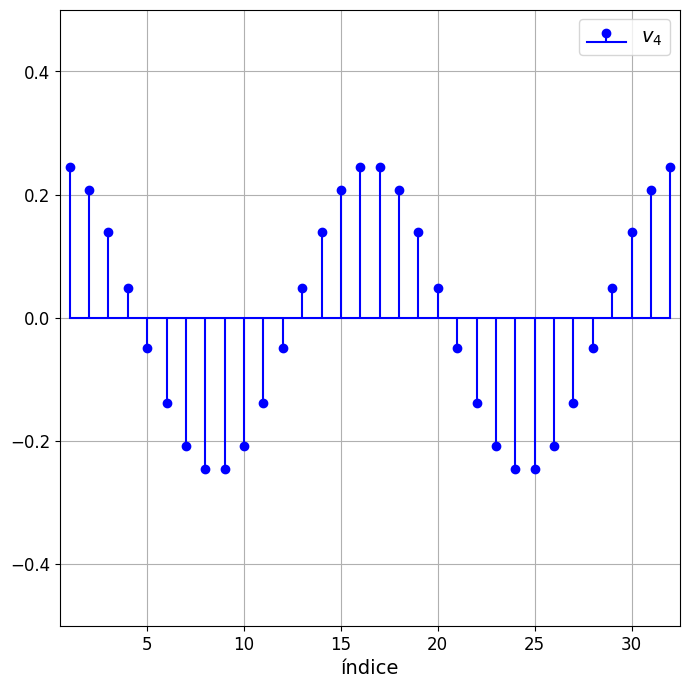

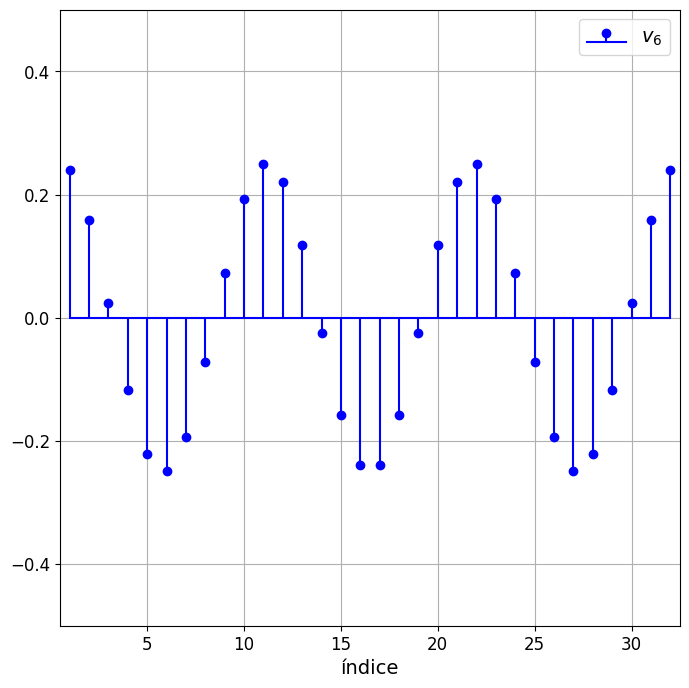

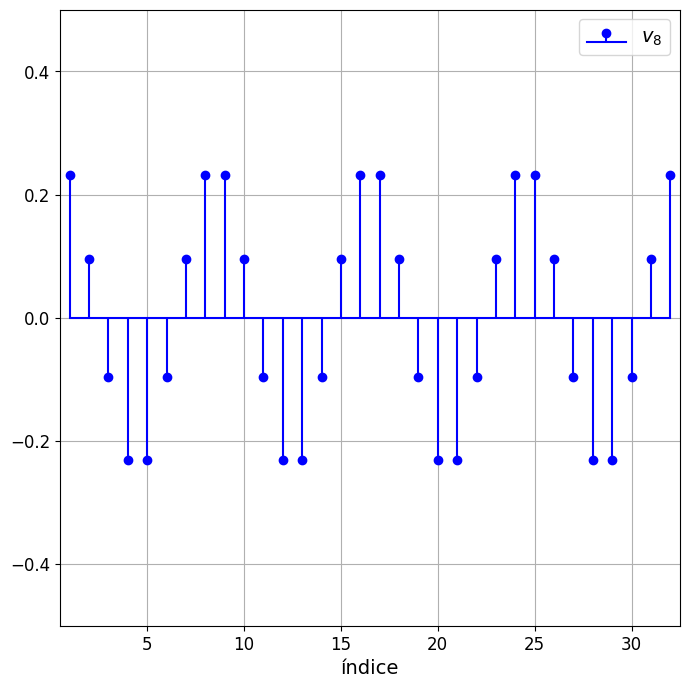

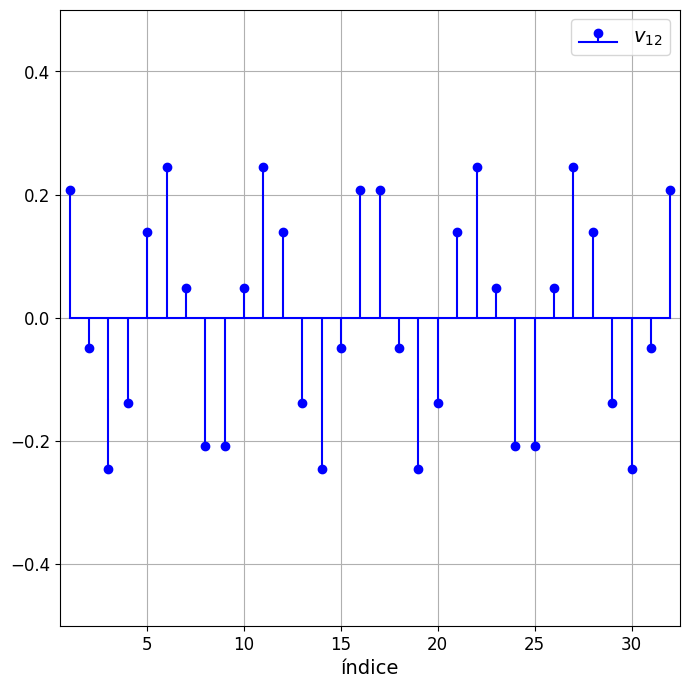

In [36]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from itertools import product
# dimension
n = 32
# elementos de la base a graficar
k = [ 4, 6, 8, 12 ]

for _k in k:
    m = np.linspace(1, n, n)
    if _k == 1:
        v = np.sqrt(1/n) * np.ones((n,))
    else:
        v = np.sqrt(2/n) * np.cos(np.pi * (m - 1/2) * _k / n)

    plt.figure(figsize=(8, 8))
    plt.stem(m, v, label='$v_{{{:n}}}$'.format(_k), basefmt='b-', linefmt='b-', markerfmt='bo')
    plt.xlim([ 0.5, n + 0.5 ])
    plt.ylim([ -0.5, 0.5 ])
    plt.grid(True)
    plt.legend(fontsize=14, loc='upper right')
    plt.xlabel('índice', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

Cuando la dimensión aumenta, podemos visualizar estos vectores como señales. Mostramos a continuación los vectores de esta base en dimensión $d = 65536$.

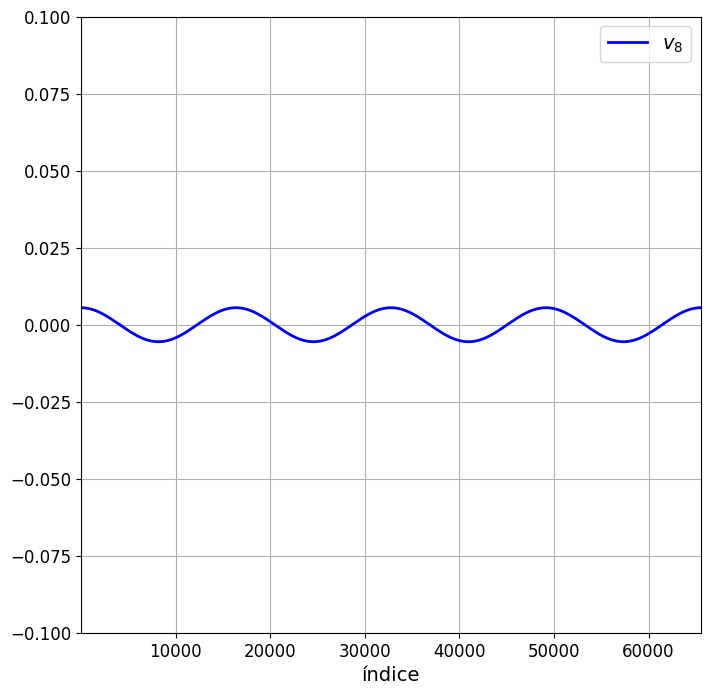

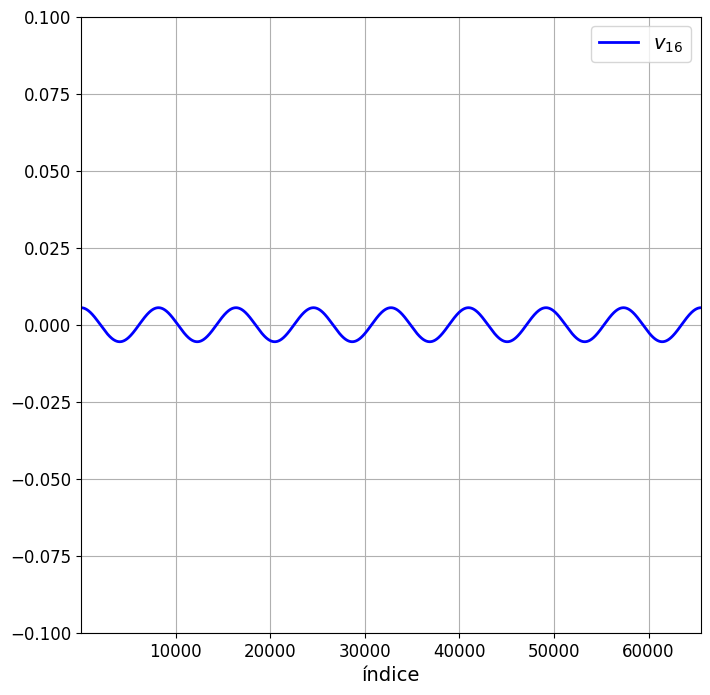

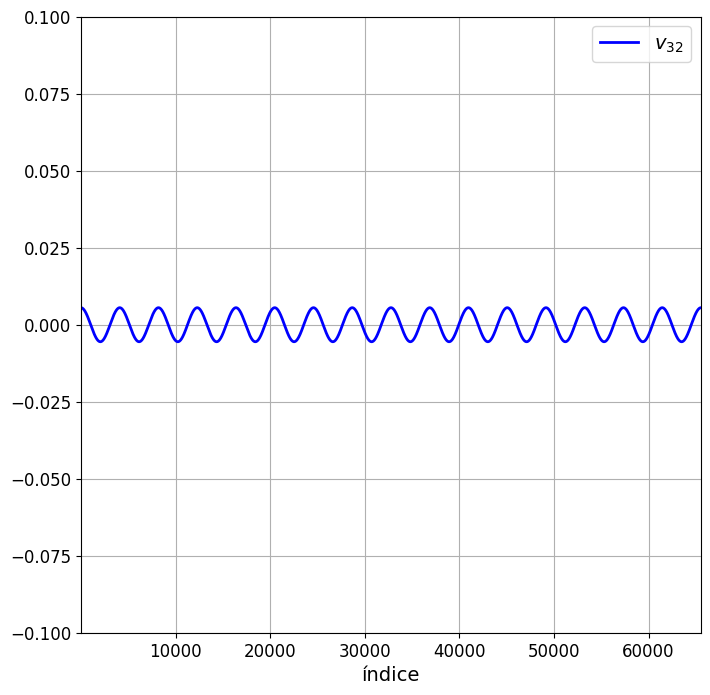

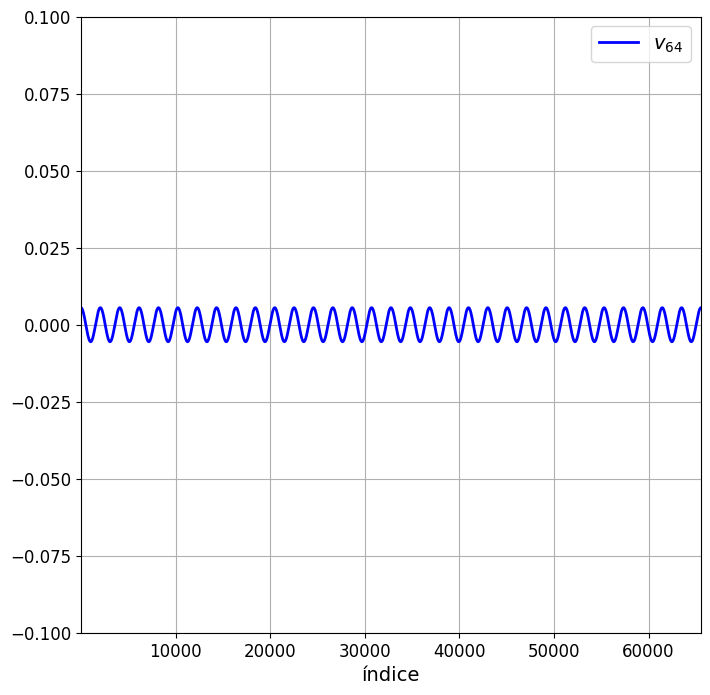

In [37]:
# dimension
n = 65536
# elementos de la base a graficar
k = [ 8, 16,32,64 ]

for _k in k:
    m = np.linspace(1, n, n)
    if _k == 1:
        v = np.sqrt(1/n) * np.ones((n,))
    else:
        v = np.sqrt(2/n) * np.cos(np.pi * (m - 1/2) * _k / n)

    plt.figure(figsize=(8, 8))
    plt.plot(m, v, label='$v_{{{:n}}}$'.format(_k), linewidth=2, color='b')
    plt.xlim([ 0.5, n + 0.5 ])
    plt.ylim([ -0.1, 0.1 ])
    plt.grid(True)
    plt.legend(fontsize=14, loc='upper right')
    plt.xlabel('índice', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

Cada uno de los elementos de esta base se asemeja a una señal sinusoidal. Esto corresponde perceptualmente a un **tono puro**. En efecto, si grabamos esta señal en un formato de audio usando la librería ``soundfile`` podemos escuchar el audio correspondiente a cada elemento de la base.

In [40]:
# para procesar audio
# !pip install soundfile
import soundfile
# frecuencia de muestreo (Hz)
fs = 44100
# elementos de la base a graficar
k = [ 256, 512, 1024, 2048 ]

for _k in k:
    m = np.linspace(1, n, n)
    if _k == 1:
        v = np.sqrt(1/n) * np.ones((d,))
    else:
        v = np.sqrt(2/n) * np.cos(np.pi * (m - 1/2) * _k / n)
    # normalizar a amplitud 1
    v = v/np.abs(v).max()
    # guardar archivo de audio
    soundfile.write('IMT3850_AUDIO_D{:d}_K{:d}.wav'.format(n, _k), v, fs)

Podemos descomponer una señal de audio en la base de coseno discreta para así analizar su **contenido en frecuencia**.

Para cargar un archivo de audio usamos nuevamente la librería ``soundfile``.

Informacion
Frecuencia de muestreo (Hz)  :  44100
Muestras                     :  464256
Intervalo (s)                :  10.52732426303855


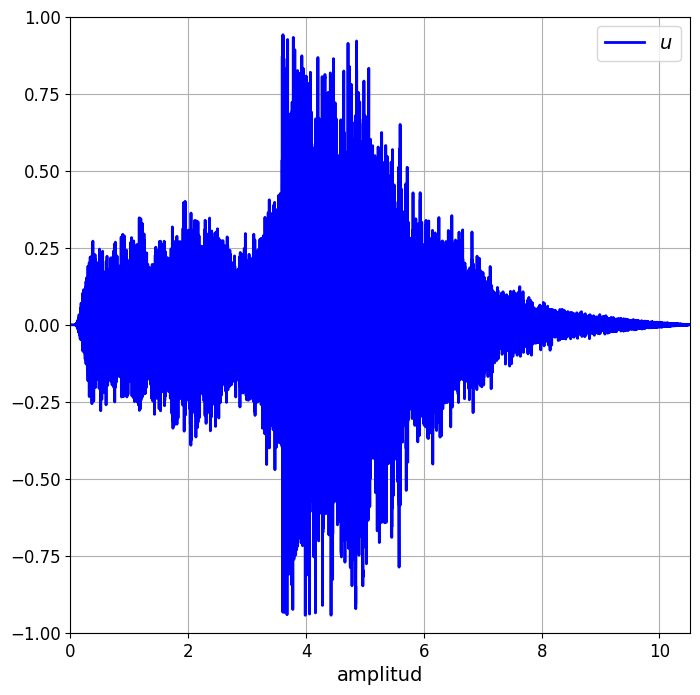

[-0.02106 -0.01944 -0.01749 -0.01526 -0.01282 -0.01019 -0.00735 -0.00418
 -0.00079  0.00272  0.00629  0.00989  0.01346  0.01691  0.0202   0.02319
  0.02606  0.02875  0.03119  0.03342  0.03549  0.03738  0.03909  0.04056
  0.04178  0.04282  0.04376  0.04462  0.04535  0.04593  0.04636  0.04675
  0.04709  0.04736  0.04739  0.04712  0.04669  0.04602  0.04517  0.04413
  0.04294  0.04169  0.04034  0.03879  0.03705  0.03513  0.03299  0.03073
  0.02838  0.026    0.02359  0.021    0.01813  0.01492  0.01141  0.0076
  0.00363 -0.00037 -0.00436 -0.00845 -0.01263 -0.01688 -0.02121 -0.02557
 -0.02988 -0.03424 -0.0386  -0.04303 -0.04752 -0.05182 -0.05597 -0.06006
 -0.06409 -0.06808 -0.0719  -0.0755  -0.07877 -0.0817  -0.08417 -0.08612
 -0.08749 -0.08826 -0.08838 -0.08789 -0.08694 -0.08542 -0.08331 -0.08075
 -0.07764 -0.07401 -0.06985 -0.06537 -0.06067 -0.05594 -0.05118 -0.04645
 -0.04187 -0.03748 -0.03329 -0.02936]


In [41]:
# la función soundfile.read retorna
#   u en una tupla con 2 elementos
#       un arreglo de N x C con muestras de audio
#           N es el número de muestras
#           C es el número de canales
#       la frecuencia de muestreo en Hz
# IMDS3120_AUDIO_CLIP.wav es monoaural y tiene sólo un canal
u = soundfile.read('IMT3850_AUDIO_CLIP.wav')

# frecuencia de muestreo de la señal (Hz)
fs = u[1]
# señal monoaural
u = u[0]
# número de muestras
num_t = u.size
# intervalo de tiempo
t_max = (num_t-1) / fs
# periodo de muestreo
dt = 1/fs
# instantes de muestreo
t = np.array([ I * dt for I in range(num_t) ])

print('Informacion')
print('Frecuencia de muestreo (Hz)  : ', fs)
print('Muestras                     : ', num_t)
print('Intervalo (s)                : ', t_max)


plt.figure(figsize=(8, 8))
plt.plot(t, u, label='$u$', linewidth=2, color='b')
plt.xlim([ 0.0, t_max ])
plt.ylim([ -1.0, +1.0 ])
plt.grid(True)
plt.legend(fontsize=14, loc='upper right')
plt.xlabel('tiempo (s)', fontsize=14)
plt.xlabel('amplitud', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

print(u[10000:10100])

### Representando audio en la base de coseno discreto

Ya que la base de coseno discreta es **ortonormal** la $k$-ésima coordenada de un vector $u$ cualquiera es
$$
    c_k = v_k \cdot u
$$
En vez de calcular el producto interior de la señal de audio con cada uno de los elementos de la base, usamos la función ``scipy.fft.dct`` con los parámetros ``type=2`` y ``norm='ortho'``. Esta función permite calcular de forma eficiente las coordenadas en muy altas dimensiones.

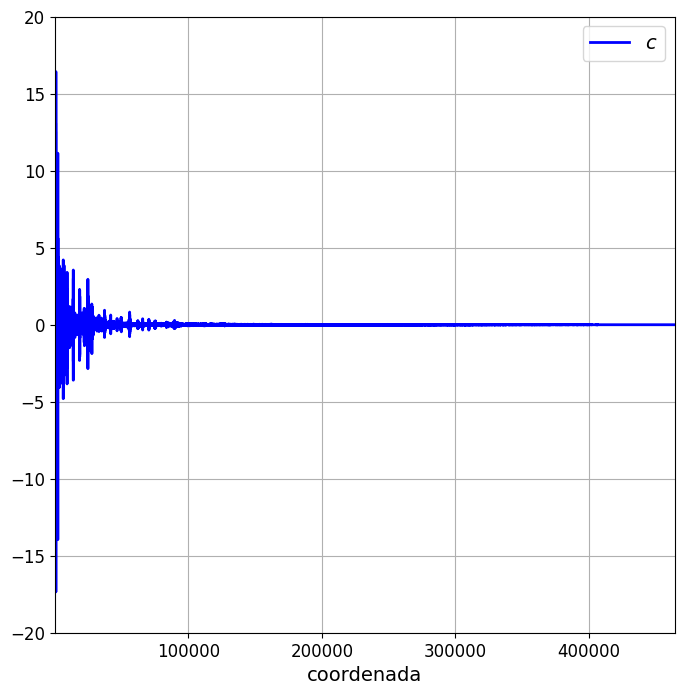

In [42]:
# importamos la función
from scipy.fft import dct
# coordenadas de u en la base del coseno discreto
cu = dct(u, type=2, norm='ortho')
# indices de las coordenadas
n = np.linspace(1, num_t, num_t)

plt.figure(figsize=(8, 8))
plt.plot(n, cu, label='$c$', linewidth=2, color='b')
plt.xlim([ 1, num_t ])
plt.ylim([ -20, +20 ])
plt.grid(True)
plt.legend(fontsize=14, loc='upper right')
plt.xlabel('índice', fontsize=14)
plt.xlabel('coordenada', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Modificando audio
Las coordenadas nos indican la contribución de cada elemento de la base al vector $u$ representando la señal de audio. Por lo tanto, modificando las coordenadas podemos modificar las propiedades de la señal de audio. Si escalamos cada coordenada
$$
    c_k \mapsto h_k c_k
$$
para algunos escalares $h_1,\ldots, h_d$ podemos luego sintentizar la señal de audio
$$
    w = \sum_{k=1}^d h_k c_k v_k
$$
Para tomar la combinación lineal de los elementos de la base de coseno discreto usamos la función ``scipy.fft.idct`` con los parámetros ``type=2`` y ``norm='ortho'``.

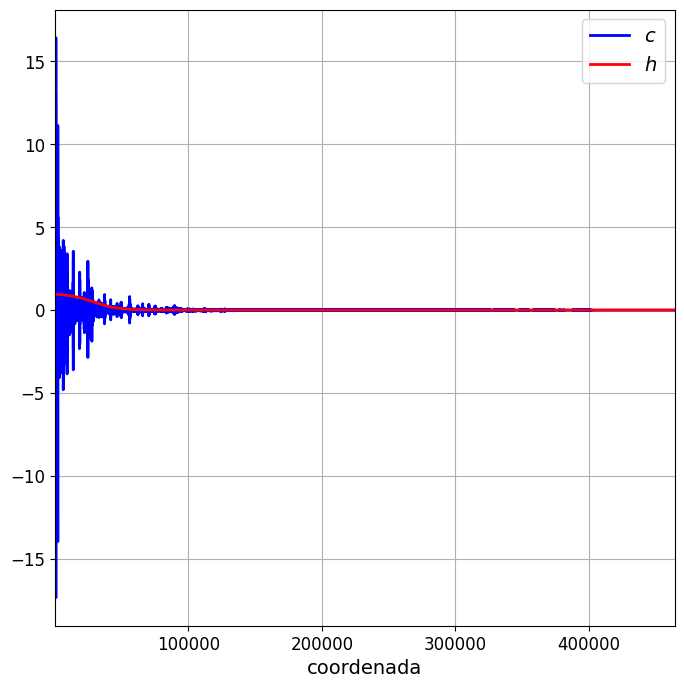

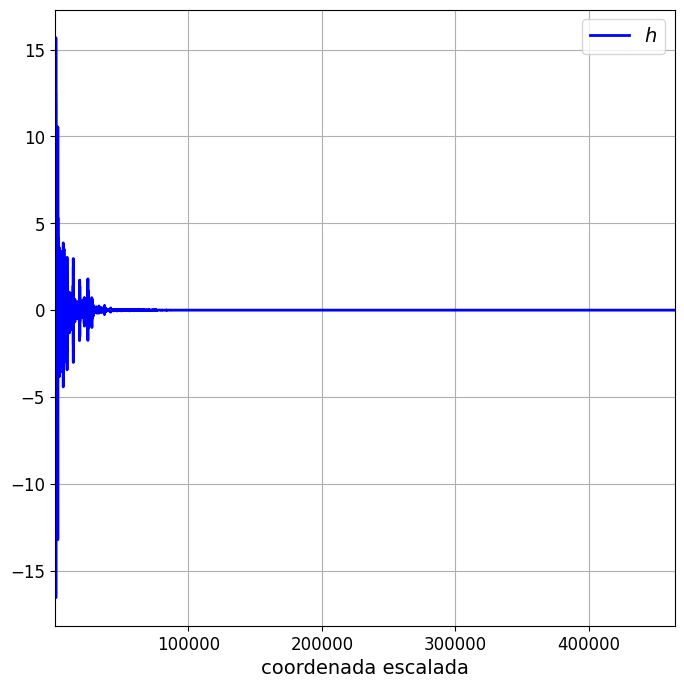

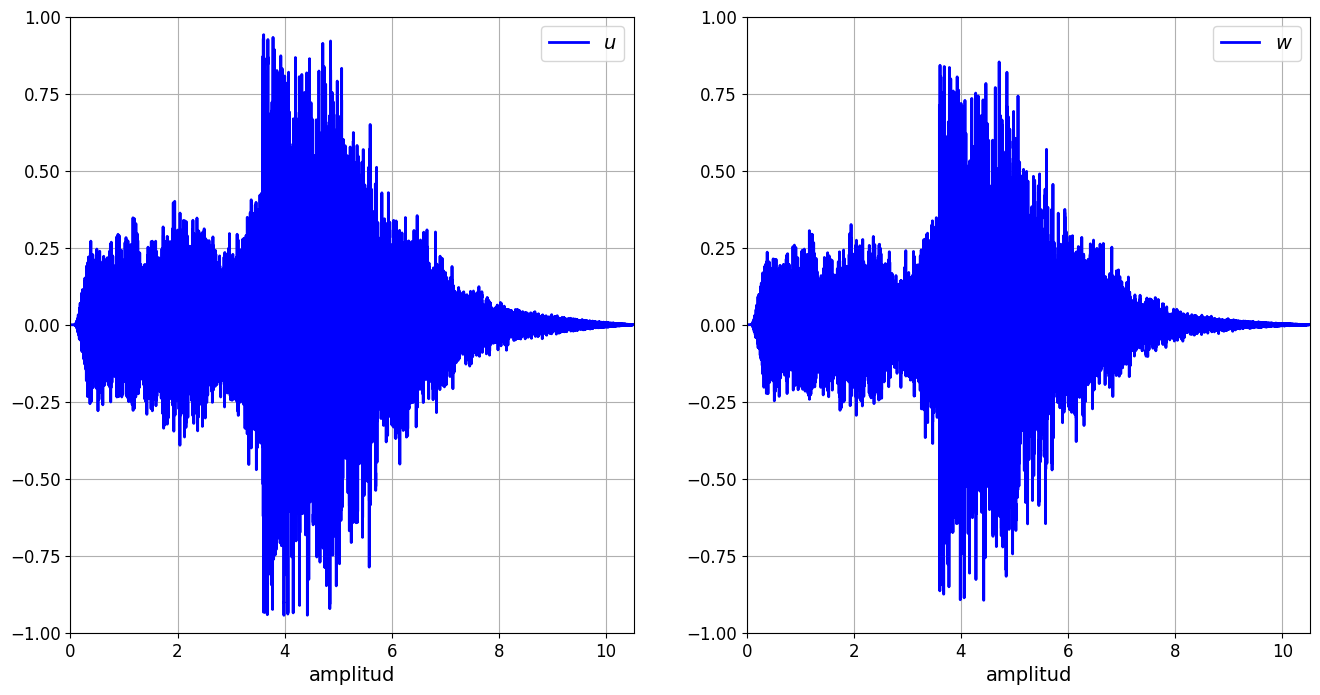

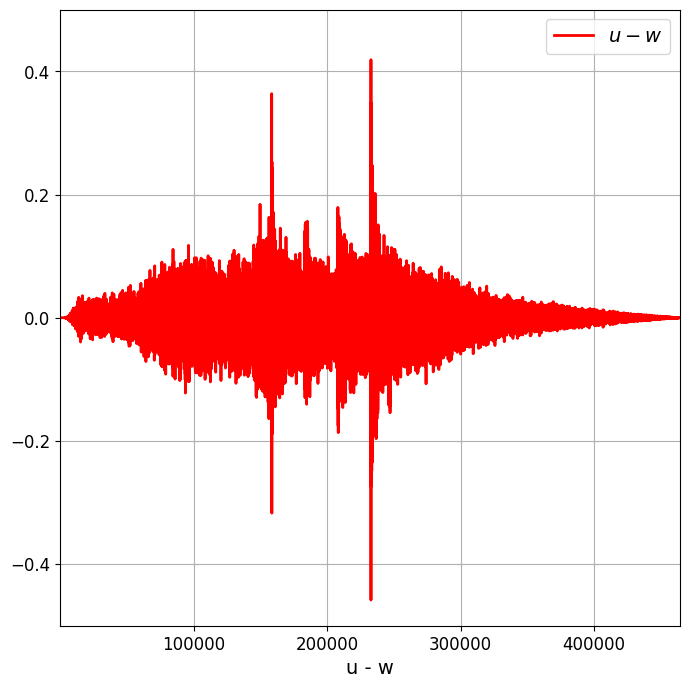

In [43]:
# parámetro de concentración
a = 50/num_t
# índice de corte
nc = num_t/16
h = np.exp(-a * (n - nc)) / (1 + np.exp(-a * (n - nc)))
# importamos la función
from scipy.fft import idct
# sintetizamos la nueva señal de audio
w = idct(h * cu, type=2, norm='ortho')
# grabamos la señal de audio
soundfile.write('IMT3850_AUDIO_CLIP_FILTER.wav', w, fs)


plt.figure(figsize=(8, 8))
plt.plot(n, cu, label='$c$', linewidth=2, color='b')
plt.plot(n, h, label='$h$', linewidth=2, color='r')
plt.xlim([ 1, num_t ])
# plt.ylim([ -1.0, +1.0 ])
plt.grid(True)
plt.legend(fontsize=14, loc='upper right')
plt.xlabel('índice', fontsize=14)
plt.xlabel('coordenada', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

plt.figure(figsize=(8, 8))
plt.plot(n, h * cu, label='$h$', linewidth=2, color='b')
plt.xlim([ 1, num_t ])
# plt.ylim([ -1.0, +1.0 ])
plt.grid(True)
plt.legend(fontsize=14, loc='upper right')
plt.xlabel('índice', fontsize=14)
plt.xlabel('coordenada escalada', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(t, u, label='$u$', linewidth=2, color='b')
plt.xlim([ 0.0, t_max ])
plt.ylim([ -1.0, +1.0 ])
plt.grid(True)
plt.legend(fontsize=14, loc='upper right')
plt.xlabel('tiempo (s)', fontsize=14)
plt.xlabel('amplitud', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.subplot(1, 2, 2)
plt.plot(t, w, label='$w$', linewidth=2, color='b')
plt.xlim([ 0.0, t_max ])
plt.ylim([ -1.0, +1.0 ])
plt.grid(True)
plt.legend(fontsize=14, loc='upper right')
plt.xlabel('tiempo (s)', fontsize=14)
plt.xlabel('amplitud', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

plt.figure(figsize=(8, 8))
plt.plot(n, u - w, label='$u - w$', linewidth=2, color='r')
plt.xlim([ 1, num_t ])
plt.ylim([ -0.5, +0.5 ])
plt.grid(True)
plt.legend(fontsize=14, loc='upper right')
plt.xlabel('índice', fontsize=14)
plt.xlabel('u - w', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [50]:
# !pip install watermark

%load_ext watermark

%watermark -v -m -p pandas,numpy,scipy,matplotlib,latexifier,soundfile,sklearn,watermark

print(" ")
%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.10.11
IPython version      : 8.29.0

pandas    : 2.2.3
numpy     : 2.1.3
scipy     : 1.14.1
matplotlib: 3.9.2
latexifier: 1.0.8
soundfile : 0.13.1
sklearn   : 1.5.2

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
CPU cores   : 8
Architecture: 64bit

 
Last updated: Wed Mar 19 2025 17:41:28Pacific SA Daylight Time

